In [1]:
!pip install tsfel

In [1]:
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, average_precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import tsfel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
ConditionGroupFileNames = os.listdir('D:/NU courses/graduation project/depresjon-dataset/data/condition')
ControlGroupFileNames = os.listdir('D:/NU courses/graduation project/depresjon-dataset/data/control')
SchizophreniaGroupFileNames = os.listdir('D:/NU courses/graduation project/psykose/patient')

In [4]:
X = []
y = []

for fileName in ConditionGroupFileNames:
    df = pd.read_csv('D:/NU courses/graduation project/depresjon-dataset/data/condition/'+str(fileName))
    dates = df['date'].unique()
    activityLevelsPerDay = []
    for date in dates:
        if len(df[df['date'] == date]) == 1440:
            temp = pd.DataFrame(df[df['date'] == date]).drop(columns=['timestamp','date'])
            activityLevelsPerDay.append(temp)
    for dailyActivityLevel in activityLevelsPerDay:
        activityVector = np.array(dailyActivityLevel["activity"])
        if len(activityVector) == 1440:
            X.append(activityVector)
            y.append(1)



In [5]:

for fileName in ControlGroupFileNames:
    df = pd.read_csv('D:/NU courses/graduation project/depresjon-dataset/data/control/'+str(fileName))
    dates = df['date'].unique()
    activityLevelsPerDay = []
    for date in dates:
        if len(df[df['date'] == date]) == 1440:
            temp = pd.DataFrame(df[df['date'] == date]).drop(columns=['timestamp','date'])
            activityLevelsPerDay.append(temp)
    for dailyActivityLevel in activityLevelsPerDay:
        activityVector = np.array(dailyActivityLevel["activity"])
        if len(activityVector) == 1440:
            X.append(activityVector)
            y.append(0)



In [6]:

for fileName in SchizophreniaGroupFileNames:
    df = pd.read_csv('D:/NU courses/graduation project/psykose/patient/'+str(fileName))
    dates = df['date'].unique()
    activityLevelsPerDay = []
    for date in dates:
        if len(df[df['date'] == date]) == 1440:
            temp = pd.DataFrame(df[df['date'] == date]).drop(columns=['timestamp','date'])
            activityLevelsPerDay.append(temp)
    for dailyActivityLevel in activityLevelsPerDay:
        activityVector = np.array(dailyActivityLevel["activity"])
        if len(activityVector) == 1440:
            X.append(activityVector)
            y.append(2)



In [7]:
for i in range(0,len(X)):
    X[i] = [X[i]]

In [8]:
X = pd.DataFrame(X)
y = pd.Series(y)

# # Make y equal to X
# y = X.iloc[:, 0]

# Now both X and y have the same values


In [9]:
X


,0
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[116, 26, 0, 67, 73, 197, 79, 0, 0, 52, 20, 0,..."
2,"[14, 469, 1260, 517, 783, 328, 286, 411, 242, ..."
3,"[29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...
1364,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1365,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1366,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1367,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [10]:
import pandas as pd

# Assuming y is your Series
y = pd.Series(y)  # Replace this with your actual y Series

# Count occurrences of each class
class_counts = y.value_counts()

# Create a DataFrame from the counts
class_counts_df = pd.DataFrame({'Class': class_counts.index, 'Count': class_counts.values})

# Create a new DataFrame with values repeated for each class
result_df = pd.DataFrame({'Class': class_counts_df['Class'].repeat(class_counts_df['Count'])})

# Print the DataFrame
print(result_df)

# Save the expanded DataFrame to a CSV file
result_df.to_csv('Y.csv', index=False)

    Class
0       0
0       0
0       0
0       0
0       0
..    ...
2       2
2       2
2       2
2       2
2       2

[1369 rows x 1 columns]


In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(X)
expanded_df = X[0].apply(pd.Series)

# Save the expanded DataFrame to a CSV file
expanded_df.to_csv('X.csv', index=False)

                                                      0
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1     [116, 26, 0, 67, 73, 197, 79, 0, 0, 52, 20, 0,...
2     [14, 469, 1260, 517, 783, 328, 286, 411, 242, ...
3     [29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5     [21, 0, 0, 0, 0, 0, 0, 5, 43, 82, 0, 0, 0, 0, ...
6     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
7     [52, 61, 0, 0, 120, 373, 268, 1042, 1474, 533,...
8     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9     [15, 0, 11, 38, 125, 37, 219, 212, 21, 454, 18...
10    [286, 783, 0, 5, 0, 0, 0, 0, 120, 212, 0, 0, 1...
11    [0, 0, 0, 91, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
12    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
13    [98, 0, 8, 0, 0, 58, 0, 8, 38, 21, 37, 361, 21...
14    [0, 0, 46, 0, 11, 18, 296, 139, 148, 0, 0, 172...
15    [0, 0, 0, 0, 0, 28, 77, 0, 0, 349, 0, 0, 0, 0,...
16    [0, 0, 0, 0, 0, 0, 0, 0, 94, 0, 0, 0, 0, 0

In [11]:
import pandas as pd

# Assuming x.csv and y.csv are your CSV files
# Use double backslashes or a raw string for the file path
x = pd.read_csv("X.csv")
y = pd.read_csv("Y.csv")

# Concatenate the two DataFrames along the columns (axis=1)
merged_df = pd.concat([x, y], axis=1)

# Save the merged DataFrame to a CSV file
merged_df.to_csv('merged_data.csv', index=False)


In [12]:
cfg = tsfel.get_features_by_domain()

In [13]:
import pandas as pd
import tsfel
import numpy as np

# Assuming X is your DataFrame and cfg is your configuration
# Example: cfg = {'selected_features': ['mean', 'std_dev', 'skewness', 'kurtosis']}

# Create an empty DataFrame to store the features
all_features_df = pd.DataFrame()

# Loop over each row in the DataFrame
for index, row in X.iterrows():
    # Flatten each time series signal (if needed)
    flattened_signals = [np.array(val).flatten() if isinstance(val, np.ndarray) else val for val in row.values]

    # Extract features for each time series in the row
    features_dict = tsfel.time_series_features_extractor(cfg, flattened_signals)

    # Flatten the 3D array into a 2D array for each feature
    flattened_features = {key: np.array(value).flatten() if isinstance(value, pd.Series) else value.flatten() for key, value in features_dict.items()}

    # Convert the features to a DataFrame with feature names as columns
    features_df = pd.DataFrame(flattened_features, index=[index])

    # Concatenate the current features DataFrame to the overall DataFrame
    all_features_df = pd.concat([all_features_df, features_df])

# Save the combined features DataFrame to a CSV file
all_features_df.to_csv('features.csv')


*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***


KeyboardInterrupt: 

In [56]:
# import pandas as pd

# # Assuming x.csv and y.csv are your CSV files
# # Use double backslashes or a raw string for the file path
# x1 = pd.read_csv("merged_data.csv")
# y1 = pd.read_csv("features.csv")

# # Drop the first column from x1
# x1 = x1.iloc[:, 1:]

# # Concatenate the two DataFrames along the columns (axis=1)
# data = pd.concat([x1, y1], axis=1)
# #
# # Save the merged DataFrame to a CSV file
# data.to_csv('Final.csv', index=False)


In [3]:
# Assuming you have a CSV file named 'Final.csv' in the specified path
df = pd.read_csv("Final.csv")

In [4]:
# Drop the 'Unnamed: 0' column
df = df.drop("Unnamed: 0", axis=1)

# Shuffling
df = df.sample(frac=1, random_state=42)

In [5]:
# Display the columns and their data types
print(df.dtypes)

1                         int64
2                         int64
3                         int64
4                         int64
5                         int64
                         ...   
0_Wavelet variance_5    float64
0_Wavelet variance_6    float64
0_Wavelet variance_7    float64
0_Wavelet variance_8    float64
0_Zero crossing rate    float64
Length: 1829, dtype: object


In [6]:
df.isna().sum()

1                       0
2                       0
3                       0
4                       0
5                       0
                       ..
0_Wavelet variance_5    0
0_Wavelet variance_6    0
0_Wavelet variance_7    0
0_Wavelet variance_8    0
0_Zero crossing rate    0
Length: 1829, dtype: int64

In [7]:
# Calculate the mean for '0_Kurtosis' and '0_Skewness' columns
mean_kurtosis = df['0_Kurtosis'].mean()
mean_skewness = df['0_Skewness'].mean()

# Fill null values in '0_Kurtosis' and '0_Skewness' columns with their respective means
df['0_Kurtosis'].fillna(mean_kurtosis, inplace=True)
df['0_Skewness'].fillna(mean_skewness, inplace=True)

In [8]:
df.isna().sum()

1                       0
2                       0
3                       0
4                       0
5                       0
                       ..
0_Wavelet variance_5    0
0_Wavelet variance_6    0
0_Wavelet variance_7    0
0_Wavelet variance_8    0
0_Zero crossing rate    0
Length: 1829, dtype: int64

In [16]:
X = df.drop('Class',axis=1)
y = df['Class']

In [10]:
# # Splitting data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=90, max_depth=6, min_samples_split=2, random_state=42)

rf.fit(X_train_scaled, y_train)

# Evaluate model performance
train_accuracy = rf.score(X_train_scaled, y_train)
test_accuracy = rf.score(X_test_scaled, y_test)

# Predict labels for the test set
y_pred = rf.predict(X_test_scaled)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)


Train accuracy: 0.8374429223744292
Test accuracy: 0.7116788321167883


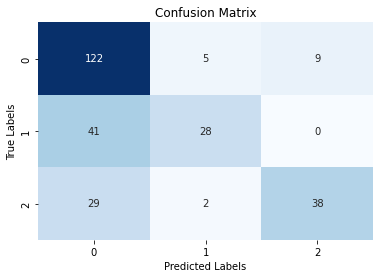

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.90      0.74       136
           1       0.80      0.41      0.54        69
           2       0.81      0.55      0.66        69

    accuracy                           0.69       274
   macro avg       0.75      0.62      0.65       274
weighted avg       0.72      0.69      0.67       274



In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, random_state=42)

rf.fit(X_train_scaled, y_train)

# Evaluate model performance
train_accuracy = rf.score(X_train_scaled, y_train)
test_accuracy = rf.score(X_test_scaled, y_test)

# Predict labels for the test set
y_pred = rf.predict(X_test_scaled)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)


Train accuracy: 0.7735159817351598
Test accuracy: 0.6861313868613139


In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have a dataset with features and corresponding labels
# Replace 'your_data.csv' with the actual dataset file
data = pd.read_csv('Final.csv')

# Assuming the target variable is named 'target'
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", classification_rep)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy on Test Set: 0.8065693430656934
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84       134
           1       0.85      0.68      0.76        75
           2       0.84      0.72      0.78        65

    accuracy                           0.81       274
   macro avg       0.82      0.77      0.79       274
weighted avg       0.81      0.81      0.80       274



In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a dataset with features and corresponding labels
# Replace 'your_data.csv' with the actual dataset file
data = pd.read_csv('Final.csv')

# Assuming the target variable is named 'target'
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = best_rf_model.predict(X_train)

# Evaluate the model on training set
accuracy_train = accuracy_score(y_train, y_train_pred)
classification_rep_train = classification_report(y_train, y_train_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("Accuracy on Training Set:", accuracy_train)
print("Classification Report on Training Set:\n", classification_rep_train)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy on Training Set: 0.993607305936073
Classification Report on Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       0.98      1.00      0.99       284
           2       1.00      0.98      0.99       275

    accuracy                           0.99      1095
   macro avg       0.99      0.99      0.99      1095
weighted avg       0.99      0.99      0.99      1095



In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have a dataset with features and corresponding labels
# Replace 'your_data.csv' with the actual dataset file
data = pd.read_csv('Final.csv')

# Assuming the target variable is named 'target'
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = best_rf_model.predict(X_train)

# Evaluate the model on training set
accuracy_train = accuracy_score(y_train, y_train_pred)
classification_rep_train = classification_report(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = best_rf_model.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("Accuracy on Training Set:", accuracy_train)
print("Classification Report on Training Set:\n", classification_rep_train)
print("\nAccuracy on Test Set:", accuracy_test)
print("Classification Report on Test Set:\n", classification_rep_test)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy on Training Set: 0.9990867579908675
Classification Report on Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       1.00      1.00      1.00       284
           2       1.00      1.00      1.00       275

    accuracy                           1.00      1095
   macro avg       1.00      1.00      1.00      1095
weighted avg       1.00      1.00      1.00      1095


Accuracy on Test Set: 0.7627737226277372
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.70      0.94      0.81       134
           1       0.85      0.52      0.64        75
           2       0.90      0.68      0.77        65

    accuracy                           0.76       274
   macro avg       0.82      0.71      0.74       274
weighted avg       0

After OverFitting

In [44]:
X_new = X
y_new = y

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_new,y_new)

In [46]:
clf = RandomForestClassifier(random_state=42)


<AxesSubplot:>

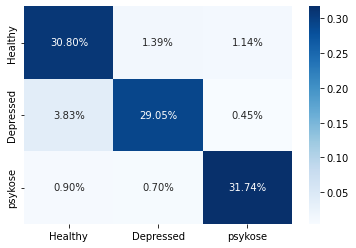

In [48]:
y_pred = cross_val_predict(clf, x_smote, y_smote, cv=10)
cf_matrix = confusion_matrix(y_smote, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues',  xticklabels=["Healthy", "Depressed","psykose"], yticklabels=["Healthy", "Depressed","psykose"])

In [49]:
# Accuracy
kfold = KFold(n_splits=10, random_state=7,shuffle=True )
results = cross_val_score(clf, x_smote, y_smote, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 92.09% (1.69%)
